In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import seaborn
from os.path import join
%matplotlib inline

In [2]:
from matplotlib.patches import Ellipse

In [3]:
mu = [1,1]
cov = [[2, 0.5], [0.5, 1]]
#cov = [[2, 0], [0, 1]]
N = 10000
X = np.random.multivariate_normal(mu, cov, N)

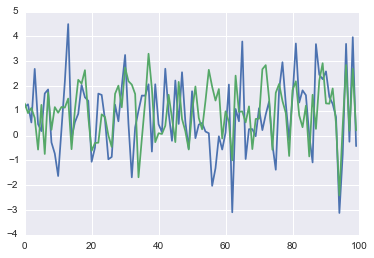

In [4]:
plt.plot(X[:100,])

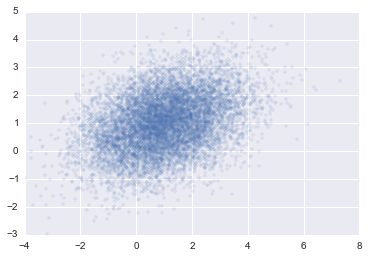

In [5]:
plt.plot(X[:,0], X[:,1], '.', alpha=0.1)

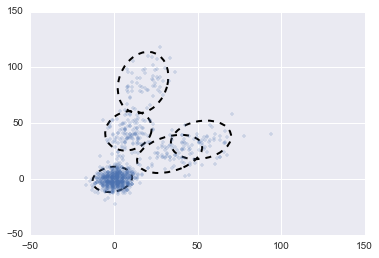

In [6]:
# So... let's look at some DME data?
import h5py
from PRmm.io import TrcH5Reader, DmeDumpReader
from PRmm.extras.ellipse import *


dmeDump = DmeDumpReader("/home/UNIXHOME/dalexander/Projects/SequelFrenzy/SimsAnalysis/T2B-reuse/dme-dump.h5")

T = TrcH5Reader("/home/UNIXHOME/dalexander/Projects/SequelFrenzy/SimsAnalysis/ffHmm_256Lx3C_102715_SNR-15.trc.h5")


lastGoodBlock = np.flatnonzero(dmeDump.blockSize[:] == 1024)[-1]


# take values from first hole, last block
hnIdx = 2
hn = dmeDump.holeNumber[hnIdx]
sf, ef = dmeDump.startFrame[lastGoodBlock], dmeDump.endFrame[lastGoodBlock]
mus = dmeDump.mean[lastGoodBlock,hnIdx,...]
covs = dmeDump.covariance[lastGoodBlock,hnIdx,...]
bl = dmeDump.baseline[lastGoodBlock,hnIdx,...]
trace = T[hn][:,sf:ef]
traceBLSubtracted = T[hn][:,sf:ef] - bl[:,np.newaxis]

ellipses = [ covarianceEllipse3(mu, cov3, 4) 
             for (mu, cov3) in zip(mus, covs)]


#plt.show(plt.figure())
plt.axis([-50, 150, -50, 150])
plt.plot(traceBLSubtracted[0,:], traceBLSubtracted[1,:], '.', alpha=0.2)
plt.plot(trace[0,:], trace[1,:], 'g.', alpha=0.2)
ax = plt.gca()

for e in ellipses:
    ax.add_artist(e)


In [ ]:
print sf, ef
print hn
print bl[:]
print trace[:,0]
print traceBLSubtracted[:,0]


In [ ]:
!h5ls -r /home/UNIXHOME/dalexander/Projects/SequelFrenzy/SimsAnalysis/T2B-/dme-dump.h5

In [ ]:
blockSize[-1]